In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
data=np.loadtxt("../week8result/best_fit1.txt")

In [6]:
r=[data[i] for i in range(len(data)) if i%2==0]
z_reio=[data[i] for i in range(len(data)) if i%2==1]

In [8]:
p1_sigma=0.0002
p2_sigma=0.046
ranges=4
steps=8

In [10]:
def posterior(chi2):
    post=np.zeros((chi2.shape[0],chi2.shape[1]))
    for i in range(chi2.shape[0]):
        for j in range(chi2.shape[1]):
            post[i,j]=np.exp(-0.5*chi2[i,j])
        #print(chi2[i,j])
    return post

In [38]:
def correct(fit_array,len_post,value,sigma,ranges):
        if len(fit_array)<len_post:#待测试
            fit_array=np.append(fit_array,value+ranges*sigma)
        elif len(fit_array)>len_post:
            fit_array=fit_array[0:-1]
        return fit_array.copy()

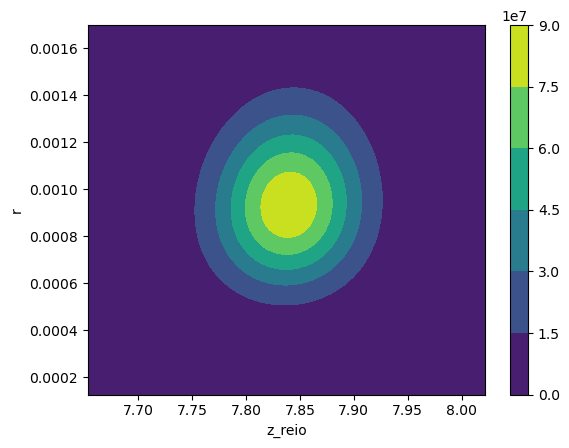

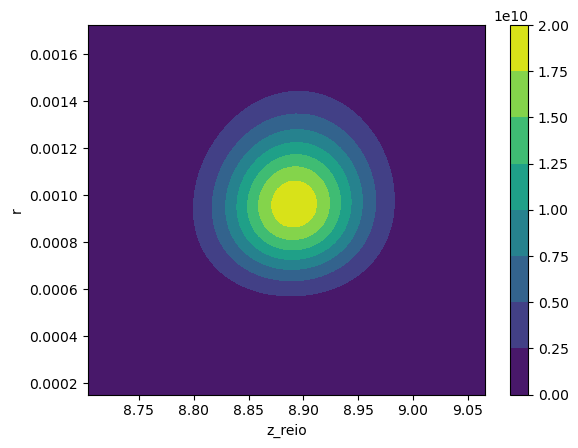

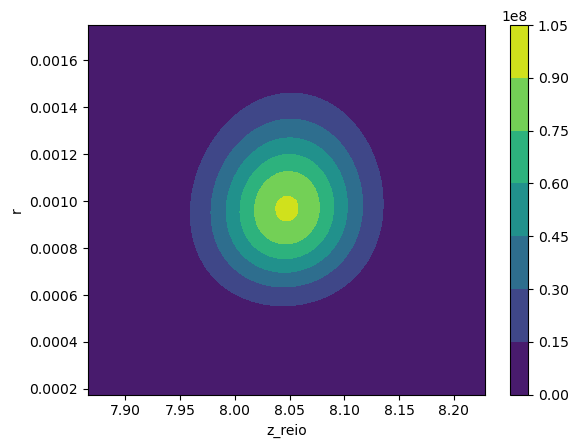

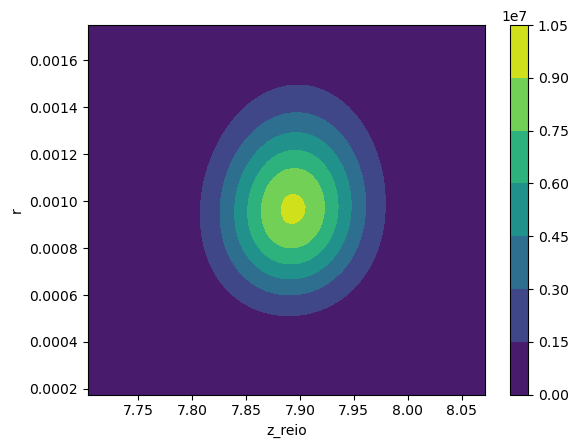

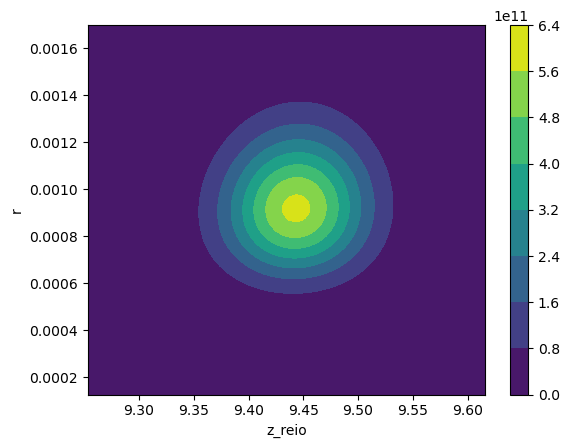

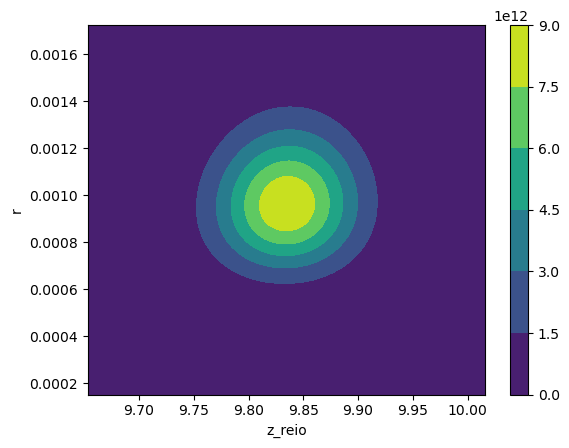

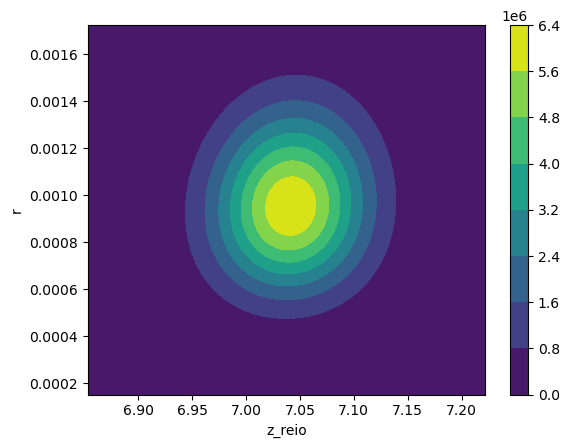

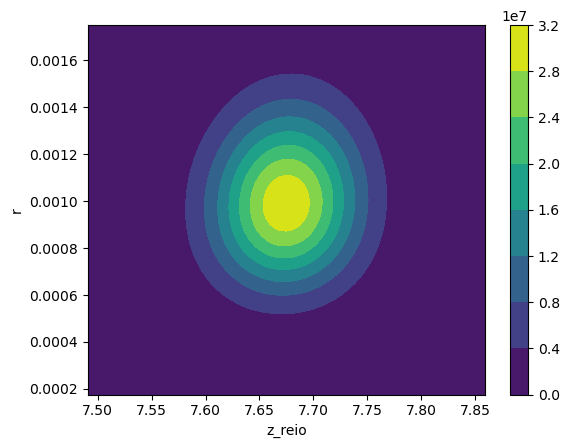

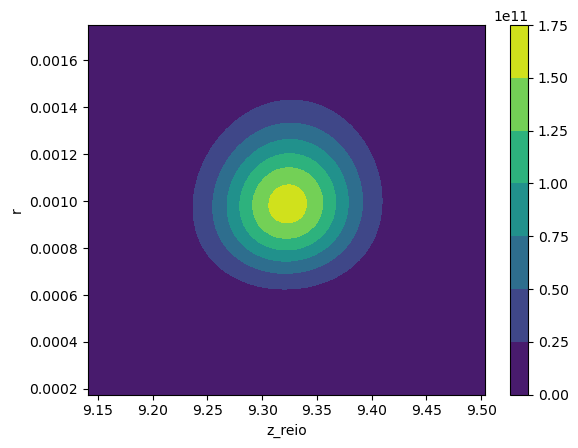

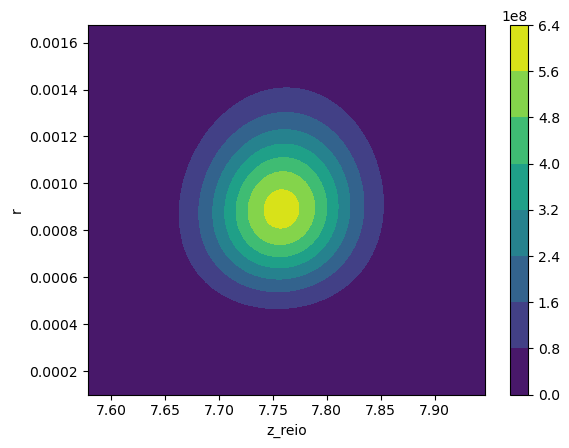

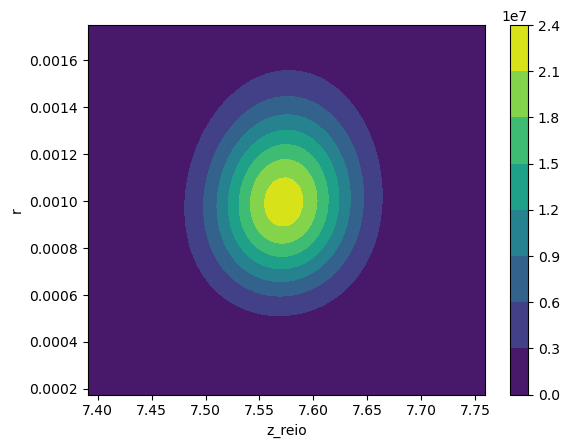

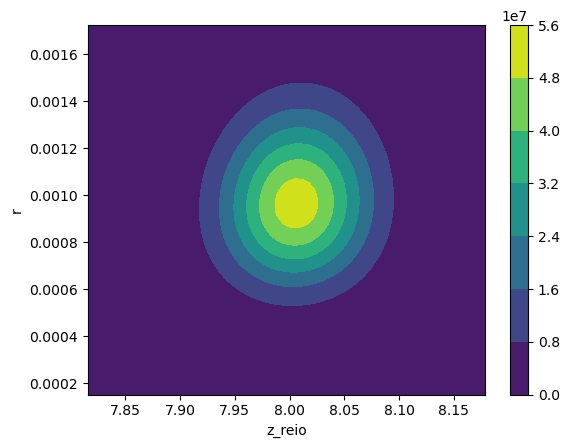

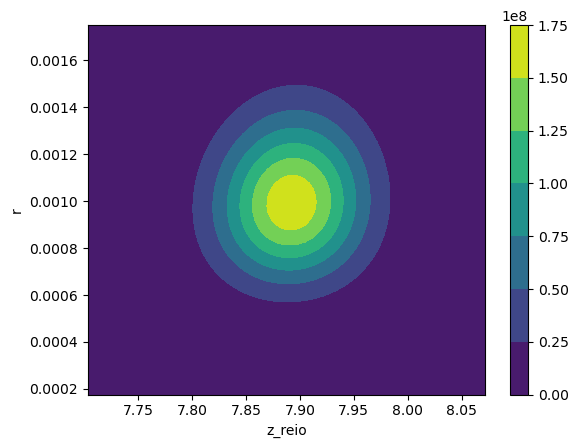

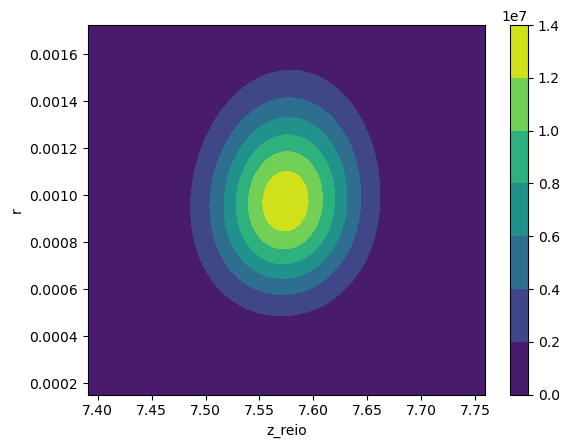

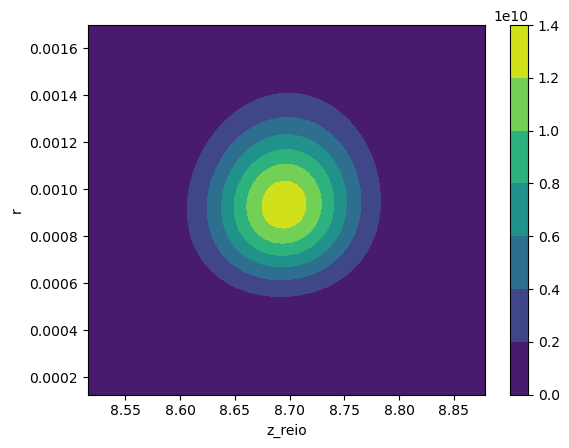

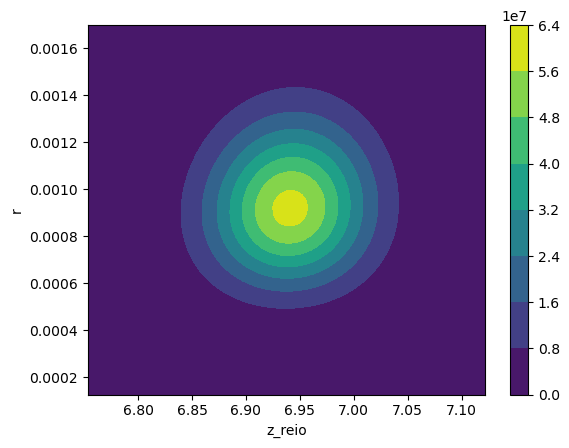

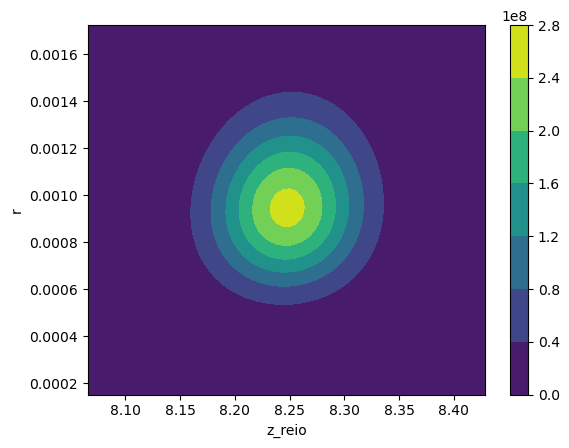

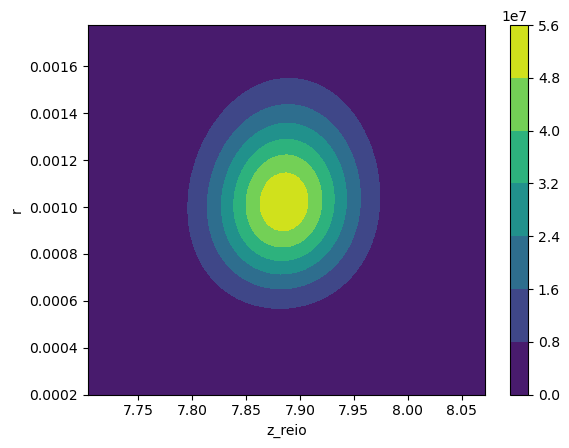

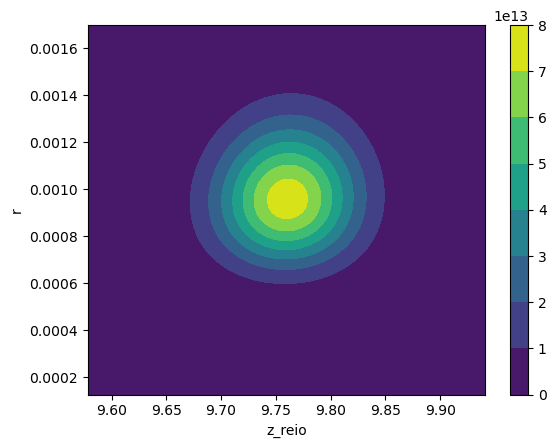

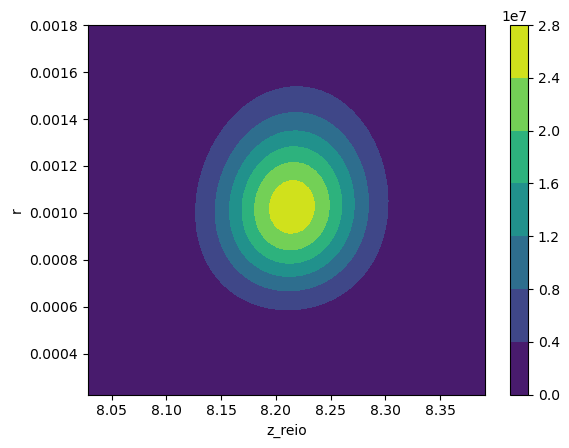

In [61]:
for i in range(len(r)):
    fig = plt.figure()
    ay=fig.add_subplot()
    chi2_total=np.load("chi21"+str(i)+".0_Wishert.npy")
    x=np.arange(float(z_reio[i]-ranges*p2_sigma),float(z_reio[i]+ranges*p2_sigma),float(p2_sigma/steps))
    y=np.arange(float(r[i]-ranges*p1_sigma),float(r[i]+ranges*p1_sigma),float(p1_sigma/steps))
    x=correct(x,chi2_total.shape[1],z_reio[i],p2_sigma,ranges)
    y=correct(y,chi2_total.shape[0],r[i],p1_sigma,ranges)
    X,Y = np.meshgrid(x,y)
    contour=ay.contourf(X,Y,posterior(chi2_total))#,colors=['blue','lightsteelblue','white'])
    ay.set_xlabel("z_reio")
    ay.set_ylabel("r")
    fig.colorbar(contour)
    plt.show()

In [ ]:
def get_posterior_1D(self,p_sigma,steps):
        self.post_p1=np.zeros(self.post.shape[0])
        self.post_p2=np.zeros(self.post.shape[1])

        for i in range(self.post.shape[0]):
            for j in range(self.post.shape[1]):
                self.post_p1[i]+=self.post[i,j]*p_sigma[1]/steps
                self.post_p2[j]+=self.post[i,j]*p_sigma[0]/steps

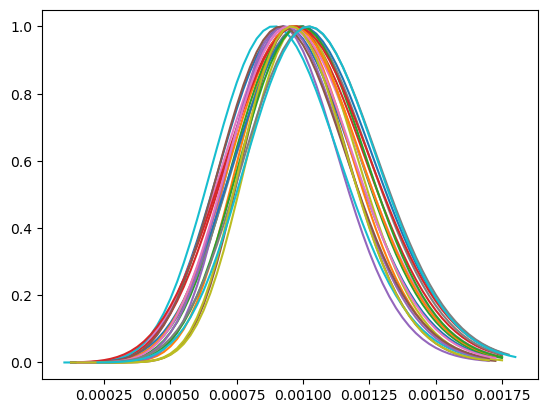

In [63]:
for i  in range(len(r)):
    chi2_total=np.load("chi21"+str(i)+".0_Wishert.npy")
    x=np.arange(float(r[i]-ranges*p1_sigma),float(r[i]+ranges*p1_sigma),float(p1_sigma/steps))
    x=correct(x,chi2_total.shape[0],r[i],p1_sigma,ranges)
    post_p1=np.zeros(chi2_total.shape[0])
    post=posterior(chi2_total)
    for p in range(post.shape[0]):
            for q in range(post.shape[1]):
                post_p1[p]+=post[p,q]*p1_sigma/steps
    post_p1=post_p1/np.max(post_p1)
    plt.plot(x,post_p1)
plt.show()


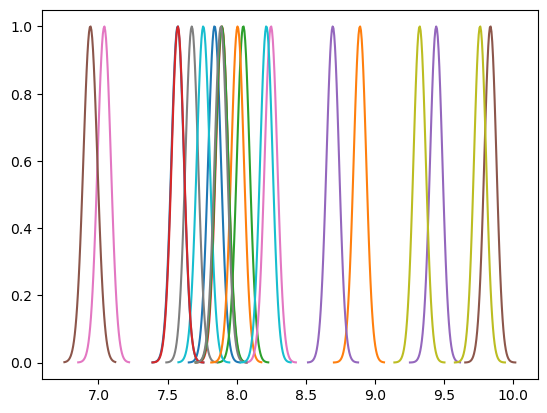

In [64]:
for i  in range(len(z_reio)):
    chi2_total=np.load("chi21"+str(i)+".0_Wishert.npy")
    x=np.arange(float(z_reio[i]-ranges*p2_sigma),float(z_reio[i]+ranges*p2_sigma),float(p2_sigma/steps))
    x=correct(x,chi2_total.shape[1],z_reio[i],p2_sigma,ranges)
    post_p2=np.zeros(chi2_total.shape[1])
    post=posterior(chi2_total)
    for p in range(post.shape[0]):
            for q in range(post.shape[1]):
                post_p2[q]+=post[p,q]*p2_sigma/steps
    post_p2=post_p2/np.max(post_p2)
    plt.plot(x,post_p2)
plt.show()